<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Total-number-of-missing-values" data-toc-modified-id="Total-number-of-missing-values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Total number of missing values</a></span></li><li><span><a href="#Total-number-of-duplicated-values" data-toc-modified-id="Total-number-of-duplicated-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total number of duplicated values</a></span></li><li><span><a href="#What-is-the-shape-of-the-data-after-dropping-the-feature-“Unnamed:-0”" data-toc-modified-id="What-is-the-shape-of-the-data-after-dropping-the-feature-“Unnamed:-0”-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What is the shape of the data after dropping the feature “Unnamed: 0”</a></span></li><li><span><a href="#Percentage-split-of-the-categories-in-the-column-“deposit”?" data-toc-modified-id="Percentage-split-of-the-categories-in-the-column-“deposit”?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Percentage split of the categories in the column “deposit”?</a></span></li><li><span><a href="#Average-age-of-the-clients-those-who-have-subscribed-to-deposit?" data-toc-modified-id="Average-age-of-the-clients-those-who-have-subscribed-to-deposit?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Average age of the clients those who have subscribed to deposit?</a></span></li><li><span><a href="#Unemployed-clients-have-subscribed-to-deposit?" data-toc-modified-id="Unemployed-clients-have-subscribed-to-deposit?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Unemployed clients have subscribed to deposit?</a></span></li><li><span><a href="#How-many-unemployed-clients-have-not-subscribed-to-deposit?" data-toc-modified-id="How-many-unemployed-clients-have-not-subscribed-to-deposit?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How many unemployed clients have not subscribed to deposit?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Count-of-unique-job-levels-in-the-data-and-find-out-how-many-clients-are-in-the-management-level?" data-toc-modified-id="Count-of-unique-job-levels-in-the-data-and-find-out-how-many-clients-are-in-the-management-level?-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Count of unique job levels in the data and find out how many clients are in the management level?</a></span></li></ul></li></ul></li><li><span><a href="#How-many-clients-with-personal-loan-has-housing-loan-as-well?" data-toc-modified-id="How-many-clients-with-personal-loan-has-housing-loan-as-well?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>How many clients with personal loan has housing loan as well?</a></span></li><li><span><a href="#Maximum-number-of-contacts-performed-during-the-campaign-for-the-clients-who-have-not-subscribed-to-deposit?" data-toc-modified-id="Maximum-number-of-contacts-performed-during-the-campaign-for-the-clients-who-have-not-subscribed-to-deposit?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Maximum number of contacts performed during the campaign for the clients who have not subscribed to deposit?</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>KNeighborsClassifier</a></span></li><li><span><a href="#New-York-Data-Set---Regression" data-toc-modified-id="New-York-Data-Set---Regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>New York Data Set - Regression</a></span><ul class="toc-item"><li><span><a href="#RMSE-&amp;-R2" data-toc-modified-id="RMSE-&amp;-R2-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>RMSE &amp; R2</a></span><ul class="toc-item"><li><span><a href="#RANDOM-FOREST-WITH-OMITTED-DATA" data-toc-modified-id="RANDOM-FOREST-WITH-OMITTED-DATA-12.1.1"><span class="toc-item-num">12.1.1&nbsp;&nbsp;</span>RANDOM FOREST WITH OMITTED DATA</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd       # To work with dataframes
import numpy as np        # Perform numerical operations
import seaborn as sns     # Required for data visualization
from sklearn.model_selection import train_test_split     # Required for dividing data into train and test set
from sklearn.linear_model import LogisticRegression      # Import library for Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix  # Import performance matrix

In [2]:
data_bank = pd.read_csv("bank_marketing.csv",index_col=0)

In [3]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [4]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 566.8+ KB


###  Total number of missing values

In [5]:
data_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data_bank1=data_bank.copy()

### Total number of duplicated values

In [7]:
data_bank1.drop_duplicates(keep='first',inplace = True)

In [8]:
data_bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 566.8+ KB


### What is the shape of the data after dropping the feature “Unnamed: 0”

In [9]:
data_bank.shape

(5581, 17)

In [10]:
data_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
data_bank['deposit']

0        no
1       yes
2        no
3        no
4        no
       ... 
5576     no
5577     no
5578     no
5579    yes
5580     no
Name: deposit, Length: 5581, dtype: object

### Percentage split of the categories in the column “deposit”?

In [12]:
pd.crosstab(index = data_bank["deposit"], columns ='count', normalize = True)

col_0,count
deposit,
no,0.530192
yes,0.469808


In [13]:
data_bank["deposit"].value_counts()

no     2959
yes    2622
Name: deposit, dtype: int64

In [14]:
pd.crosstab(index = data_bank["deposit"], columns = data_bank['age'] , margins = True, normalize = 'index')

age,18,19,20,21,22,23,24,25,26,27,...,81,82,83,84,86,87,88,89,92,93
deposit,,,,,,,,,,,,,,,,,,,,,
no,0.000338,0.000338,0.001014,0.001352,0.001690,0.003717,0.004731,0.007435,0.015884,0.021291,...,0.000676,0.000676,0.000000,0.000000,0.000000,0.000338,0.000338,0.000338,0.000000,0.000000
yes,0.000381,0.002288,0.002670,0.004958,0.008391,0.010297,0.012204,0.024790,0.027079,0.025172,...,0.001907,0.000763,0.001907,0.001144,0.001144,0.000763,0.000000,0.000000,0.000763,0.000763
All,0.000358,0.001254,0.001792,0.003046,0.004838,0.006809,0.008242,0.015589,0.021143,0.023114,...,0.001254,0.000717,0.000896,0.000538,0.000538,0.000538,0.000179,0.000179,0.000358,0.000358


In [15]:
data_bank.loc[:,['deposit','age']] 

,deposit,age
0,no,41
1,yes,56
2,no,30
3,no,34
4,no,29
...,...,...
5576,no,48
5577,no,40
5578,no,27
5579,yes,46


In [16]:
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [17]:
(data_bank['deposit']=='yes').sum()

2622

### Average age of the clients those who have subscribed to deposit?

In [18]:
data_bank.pivot_table(index=['deposit'],values=['age'],aggfunc='mean')

,age
deposit,
no,40.941872
yes,41.426773


In [19]:
data_bank.pivot_table(index=['deposit'],values=['age'],aggfunc='count')

,age
deposit,
no,2959
yes,2622


### Unemployed clients have subscribed to deposit? 
### How many unemployed clients have not subscribed to deposit? 

In [20]:
### 93 & 78

In [21]:
data_bank.pivot_table(index=['job','deposit'],values=['age'],aggfunc='count')

age
job           deposit     
admin.        no       355
              yes      306
blue-collar   no       629
              yes      346
entrepreneur  no       105
              yes       55
housemaid     no        83
              yes       60
management    no       649
              yes      669
retired       no       142
              yes      255
self-employed no       103
              yes      103
services      no       263
              yes      189
student       no        53
              yes      129
technician    no       481
              yes      406
unemployed    no        78
              yes       92
unknown       no        18
              yes       12

##### Count of unique job levels in the data and find out how many clients are in the management level?

In [22]:
data_bank.pivot_table(index=['job'],values=['deposit'],aggfunc='count')

,deposit
job,
admin.,661
blue-collar,975
entrepreneur,160
housemaid,143
management,1318
retired,397
self-employed,206
services,452
student,182


### How many clients with personal loan has housing loan as well?

In [23]:
### 397

In [24]:
data_bank.pivot_table(index=['loan','housing'],values=['age'],aggfunc='count')

age
loan housing      
no   no       2607
     yes      2256
yes  no        321
     yes       397

In [25]:
data_bank.pivot_table(index=['deposit'],values=['balance'],aggfunc='max')

,balance
deposit,
no,56831
yes,81204


In [26]:
data_bank.pivot_table(index=['deposit'],values=['balance'],aggfunc='min')

,balance
deposit,
no,-2712
yes,-3058


### Maximum number of contacts performed during the campaign for the clients who have not subscribed to deposit?

In [27]:
data_bank["campaign"].value_counts()

1     2367
2     1526
3      687
4      379
5      206
6      131
7       66
8       62
9       39
10      20
11      19
13      13
12      11
14       9
15       8
17       6
21       5
16       3
18       3
24       3
22       2
32       2
19       2
20       1
28       1
23       1
33       1
31       1
25       1
41       1
43       1
26       1
30       1
27       1
63       1
Name: campaign, dtype: int64

In [28]:
data_bank.pivot_table(index=['campaign','deposit'],values=['age'],aggfunc='count')

age
campaign deposit      
1        no       1105
         yes      1262
2        no        816
         yes       710
3        no        376
         yes       311
4        no        234
         yes       145
5        no        140
         yes        66
6        no         80
         yes        51
7        no         47
         yes        19
8        no         45
         yes        17
9        no         30
         yes         9
10       no         14
         yes         6
11       no          9
         yes        10
12       no          9
         yes         2
13       no         10
         yes         3
14       no          7
         yes         2
15       no          6
         yes         2
16       no          2
         yes         1
17       no          2
         yes         4
18       no          3
19       no          2
20       no          1
21       no          4
         yes         1
22       no          2
23       no          1
24       no          3
25       no          1
26       no          1
27       no          1
28       no          1
30       no          1
31       no          1
32       no          1
         yes         1
33       no          1
41       no          1
43       no          1
63       no          1

In [29]:
data_bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [30]:
data_bank1['deposit'] = data_bank1['deposit'].map({'yes':1, 'no':0})
print(data_bank1['deposit'])

0       0
1       1
2       0
3       0
4       0
       ..
5576    0
5577    0
5578    0
5579    1
5580    0
Name: deposit, Length: 5581, dtype: int64


In [31]:
data_bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,0
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,1
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,0
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,0
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,0


In [32]:
data3 = pd.get_dummies(data_bank1, drop_first = True)

In [33]:
data3.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,41,88,11,105,1,336,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,56,1938,26,229,1,192,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,30,245,8,187,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,34,1396,17,630,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,29,-13,14,512,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Logistic Regression

In [34]:
columns_list = list(data3.columns)
features = list(set(columns_list)- set(['deposit']))
y = data3['deposit'].values
x = data3[features].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3906, 42)
(1675, 42)
(3906,)
(1675,)


In [35]:
logistic = LogisticRegression()
logistic.fit(train_x,train_y)
prediction = logistic.predict(test_x)
conf_matrix = confusion_matrix(test_y,prediction)
print(conf_matrix)
acc_score = accuracy_score(test_y,prediction)
print(acc_score)

[[760 142]
 [193 580]]
0.8


c:\users\dibyendu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [37]:
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(train_x,train_y)
prediction = KNN.predict(test_x)
conf_matrix = confusion_matrix(test_y,prediction)
print(conf_matrix)
acc_score = accuracy_score(test_y,prediction)
print(acc_score)

[[717 185]
 [226 547]]
0.7546268656716418


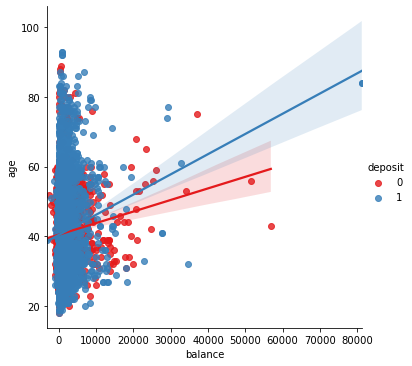

In [38]:
sns.lmplot(x ='balance', y= 'age',data = data3,fit_reg = True, hue ='deposit', legend = True, palette = "Set1")

<AxesSubplot:xlabel='age', ylabel='balance'>

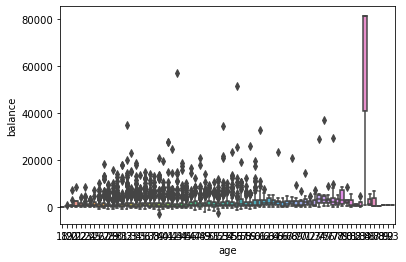

In [39]:
sns.boxplot(x=data3["age"],y=data3["balance"])

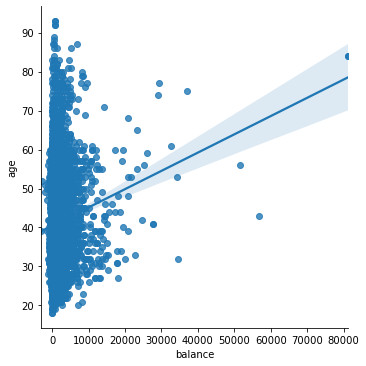

In [40]:
sns.lmplot(x ='balance', y= 'age',data = data3,fit_reg = True, legend = True, palette = "Set1")

In [41]:
data_bank["education"].value_counts()

secondary    2719
tertiary     1871
primary       746
unknown       245
Name: education, dtype: int64

### New York Data Set - Regression

In [42]:
nyc = pd.read_csv("nyc.csv")

In [43]:
nyc.head()

,Price,Food,Decor,Service,East
0,43,22,18,20,0
1,32,20,19,19,0
2,34,21,13,18,0
3,41,20,20,17,0
4,54,24,19,21,0


In [44]:
nyc

,Price,Food,Decor,Service,East
0,43,22,18,20,0
1,32,20,19,19,0
2,34,21,13,18,0
3,41,20,20,17,0
4,54,24,19,21,0
...,...,...,...,...,...
163,31,17,15,16,0
164,26,20,16,17,0
165,31,18,16,17,0
166,38,22,17,21,0


In [45]:
nyc.isnull().sum()

Price      0
Food       0
Decor      0
Service    0
East       0
dtype: int64

In [46]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Price    168 non-null    int64
 1   Food     168 non-null    int64
 2   Decor    168 non-null    int64
 3   Service  168 non-null    int64
 4   East     168 non-null    int64
dtypes: int64(5)
memory usage: 6.6 KB


In [47]:
nyc.shape

(168, 5)

c:\users\dibyendu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

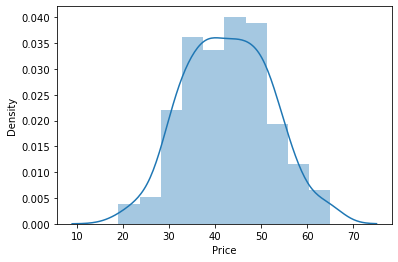

In [49]:
sns.distplot(nyc['Price'])

In [58]:
from sklearn.model_selection import train_test_split     # Required for dividing data into train and test set
from sklearn.linear_model import LinearRegression      # Import library for Linear Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [50]:
x1 = nyc.drop(['Price'],axis ='columns',inplace = False)
y1 = nyc['Price']

In [53]:
print(x1.shape)
print(y1.shape)

(168, 4)
(168,)


In [55]:
train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size=0.3,random_state=0)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(117, 4) (51, 4) (117,) (51,)


In [56]:
base_pred = np.mean(test_y)
base_pred = np.repeat(base_pred, len(test_y))
base_pred

array([42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471, 42.41176471, 42.41176471, 42.41176471, 42.41176471,
       42.41176471])

In [59]:
base_RMSE = np.sqrt(mean_squared_error(test_y,base_pred))
print(base_RMSE)

7.929039381492825


#### RMSE & R2

In [60]:
lgr = LinearRegression(fit_intercept = True)
model_lin1 = lgr.fit(train_x,train_y)
nyc_pred = lgr.predict(test_x) 
lin_MSE = mean_squared_error(test_y,nyc_pred)
lin_RMSE = np.sqrt(lin_MSE)
print(lin_RMSE)

5.725136509138464


In [61]:
r2_lin_test = model_lin1.score(test_x,test_y)
r2_lin_train = model_lin1.score(train_x,train_y)
print(r2_lin_test,r2_lin_train)

0.4786486013456698 0.6687940248195396


<AxesSubplot:ylabel='Price'>

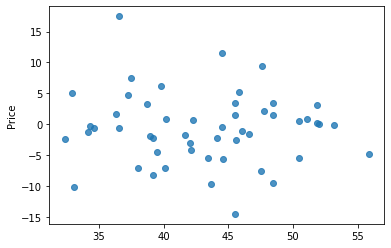

In [64]:
residual = test_y - nyc_pred
sns.regplot(x = nyc_pred, y = residual, scatter = True,fit_reg = False, data =nyc)

##### RANDOM FOREST WITH OMITTED DATA

In [65]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'auto',
                          max_depth = 100, min_samples_split = 10,
                          min_samples_leaf=4,random_state = 1)

In [66]:
model_rf = rf.fit(train_x,train_y)
nyc_pred1 = rf.predict(test_x) 
rf_MSE = mean_squared_error(test_y,nyc_pred1)
rf_RMSE = np.sqrt(rf_MSE)
print(rf_RMSE)

5.90034145738796


In [67]:
r2_rf_test = model_rf.score(test_x,test_y)
r2_rf_train = model_rf.score(train_x,train_y)
print(r2_rf_test,r2_rf_train)

0.44625076291481025 0.7158614812390722
